In [1]:
%matplotlib inline
from IPython.display import display, HTML
from analysis import Analysis
from models import *
analysis = Analysis('weather', normalize=True, logger=display)
analysis.load_data()

//anaconda/envs/python35/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now setting the predictor to be the avg temperature value.

The features will be the actual_min_temp, actual_max_temp, and the actual_precipitation.

In [2]:
predictor = 'actual_mean_temp'
features = ['actual_min_temp', 'actual_max_temp', 'actual_precipitation']
analysis.set_feature_predictor_columns(features, predictor)
analysis.train_test_split()

'Number of train data points: 292'

'Number of test data points: 73'

Set some parameters that are used by some of the models

In [3]:
# The number of days to chunk inputs by
NUM_DAYS = 5

# 
NUM_FEATURES = len(analysis.features)

Going to try each different model.

ARIMA

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1820.596, BIC=1850.010, Fit time=1.605 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1960.996, BIC=1986.733, Fit time=1.906 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1831.782, BIC=1857.519, Fit time=2.147 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1821.708, BIC=1854.798, Fit time=2.666 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1983.979, BIC=2009.716, Fit time=0.702 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=0.391 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1823.311, BIC=1860.079, Fit time=6.199 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1815.071, BIC=1848.161, Fit time=1.964 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1

'Train Error: 5.01309155125  Num NaN: 0'

'Test Error: 5.85902638345    Num NaN: 0'

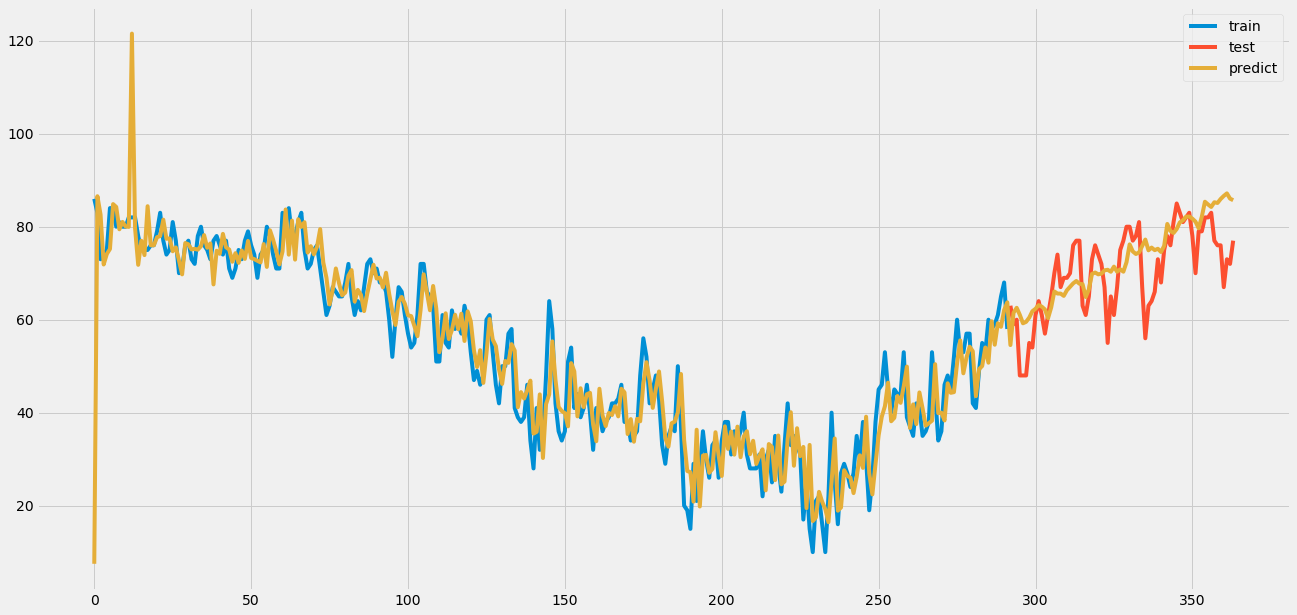

In [4]:
model = ARIMA(analysis)
analysis.run_model(model)

'Train Error: 4.20753424658  Num NaN: 0'

'Test Error: 5.06666666667    Num NaN: 0'

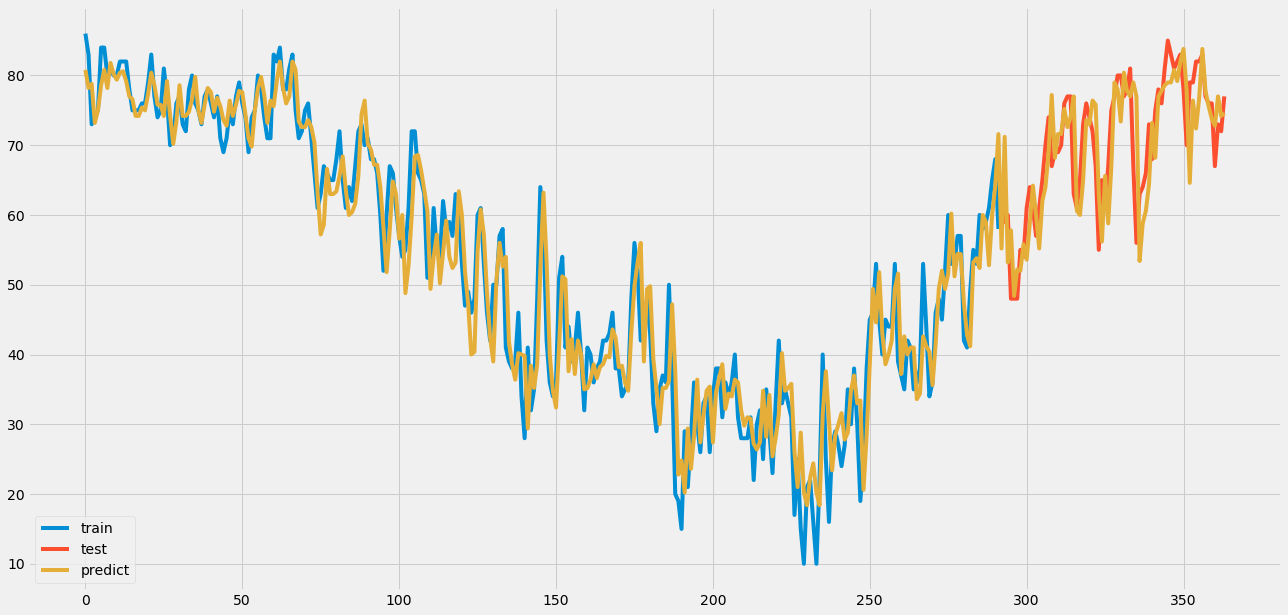

In [5]:
from sklearn.neighbors import KNeighborsRegressor
model = Regressor(analysis, KNeighborsRegressor)
analysis.run_model(model)

//anaconda/envs/python35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


'Train Error: 7.67308829123  Num NaN: 0'

'Test Error: 7.70189030868    Num NaN: 0'

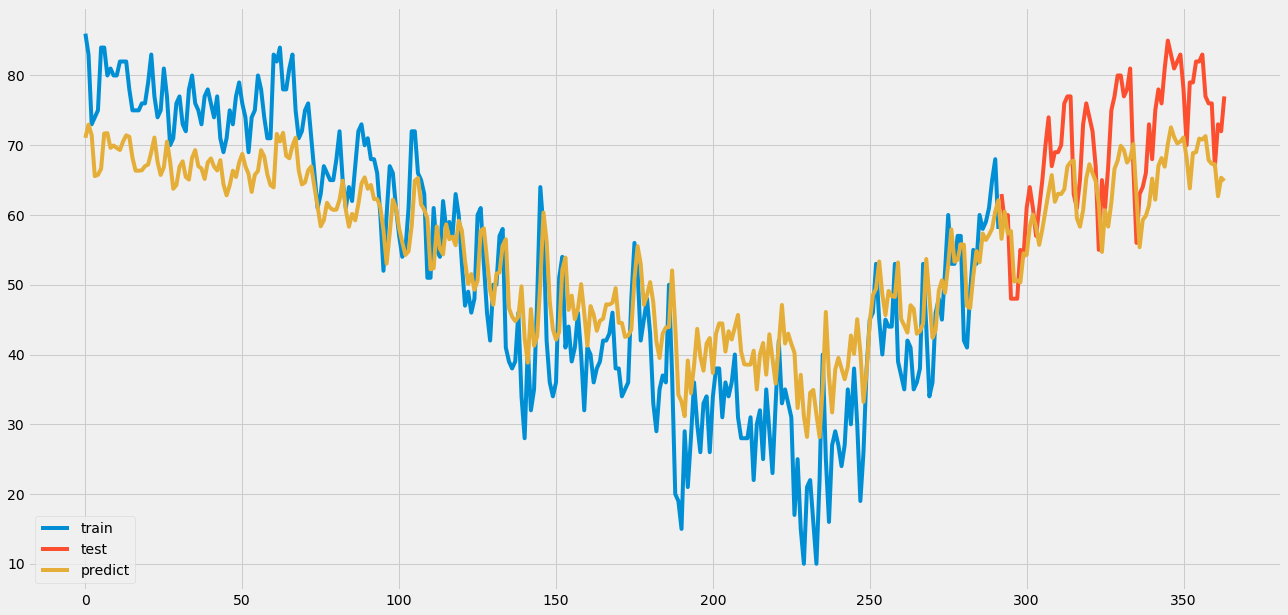

In [6]:
from sklearn.linear_model import SGDRegressor
model = Regressor(analysis, SGDRegressor)
analysis.run_model(model)

'Train Error: 2.14065068493  Num NaN: 0'

'Test Error: 4.5481712963    Num NaN: 0'

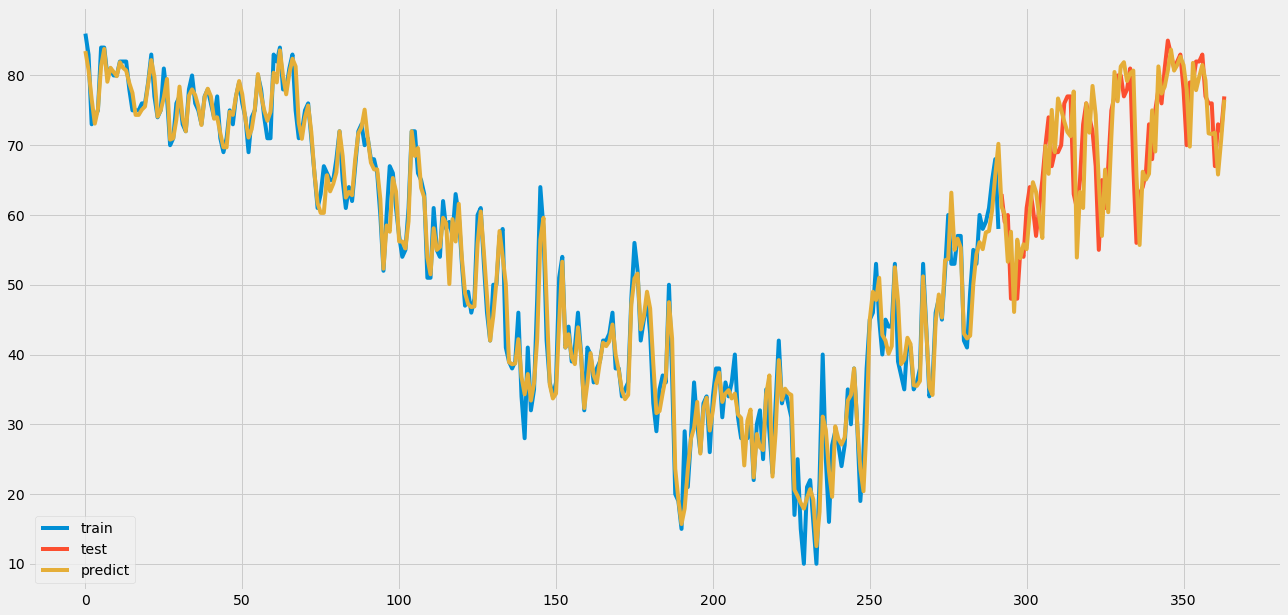

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = Regressor(analysis, RandomForestRegressor)
analysis.run_model(model)

'Train Error: 4.45574839443  Num NaN: 0'

'Test Error: 4.90538726478    Num NaN: 0'

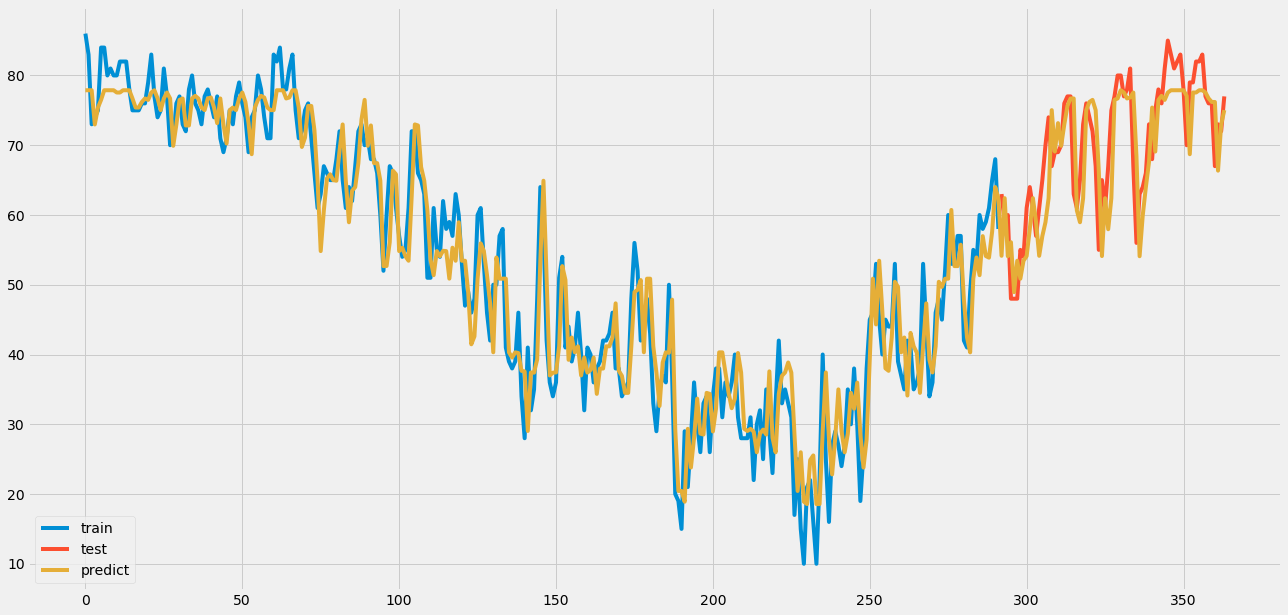

In [8]:
from sklearn.ensemble import AdaBoostRegressor
model = Regressor(analysis, AdaBoostRegressor)
analysis.run_model(model)

'Train Error: 3.79137995472  Num NaN: 0'

'Test Error: 25.3807644314    Num NaN: 0'

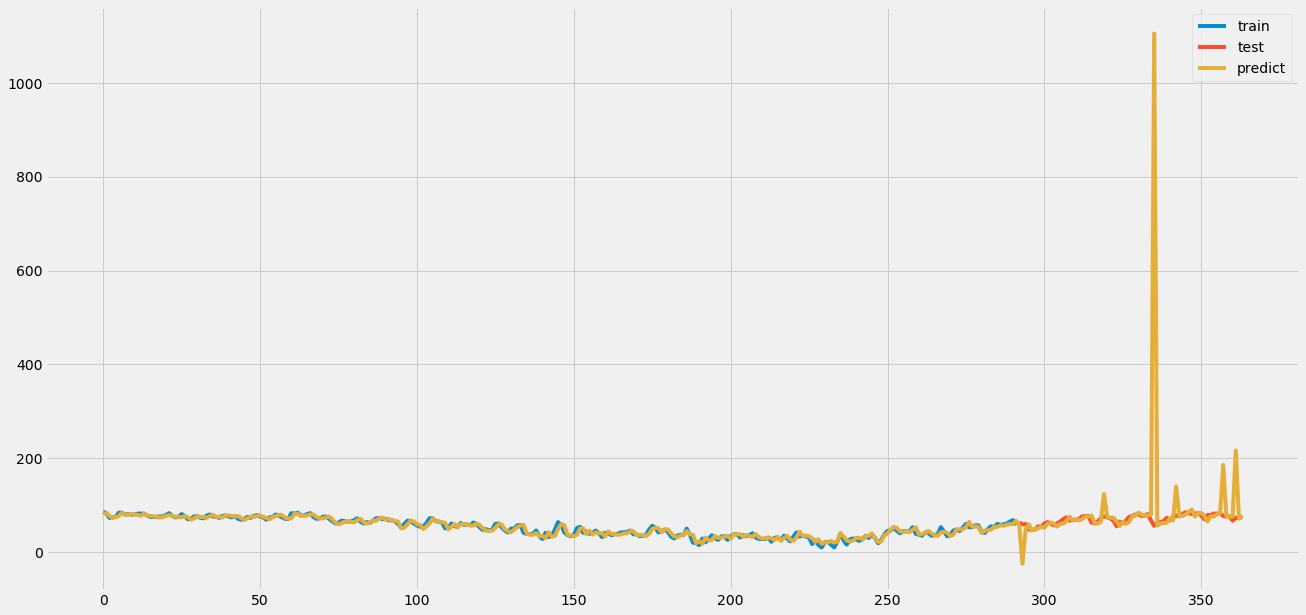

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = Regressor(analysis, GaussianProcessRegressor)
analysis.run_model(model)

Now going to use models that require chunking.  We perform chunking by taking the time series:

x = (x0, x1, x2, x3, ...)
y = (x1, x2, x3, x4, ...)

and modifying it such that if the chunk parameter, c, is set to 3:

x = ((x0, x1, x2), (x1, x2, x3), (x2, x3, x4), ...)
y = (x3, x4, x5, ...)

This results in the first c values in not having a prediction and thus (Num NaN is > 0 and == c).



LinearRegression

'Train Error: 5.57624418585  Num NaN: 5'

'Test Error: 6.32932107205    Num NaN: 5'

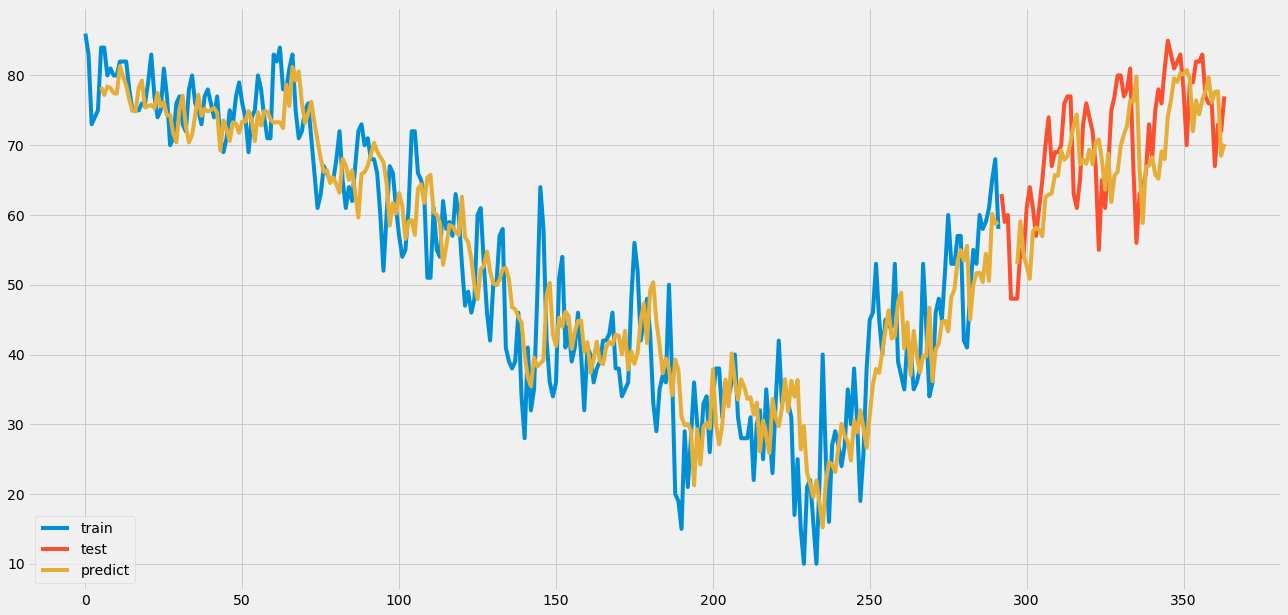

In [10]:
model = LinearRegression(analysis, num_days=NUM_DAYS)
analysis.run_model(model)

FeedForward Neural Network

Using TensorFlow backend.


Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 0s - loss: 0.2478 - val_loss: 0.1619
Epoch 2/10
 - 0s - loss: 0.1453 - val_loss: 0.1588
Epoch 3/10
 - 0s - loss: 0.1340 - val_loss: 0.1436
Epoch 4/10
 - 0s - loss: 0.1259 - val_loss: 0.1138
Epoch 5/10
 - 0s - loss: 0.1195 - val_loss: 0.1079
Epoch 6/10
 - 0s - loss: 0.1173 - val_loss: 0.1041
Epoch 7/10
 - 0s - loss: 0.1136 - val_loss: 0.1044
Epoch 8/10
 - 0s - loss: 0.1115 - val_loss: 0.1022
Epoch 9/10
 - 0s - loss: 0.1107 - val_loss: 0.1027
Epoch 10/10
 - 0s - loss: 0.1095 - val_loss: 0.1051


'Train Error: 8.0534719208  Num NaN: 5'

'Test Error: 7.88029121285    Num NaN: 5'

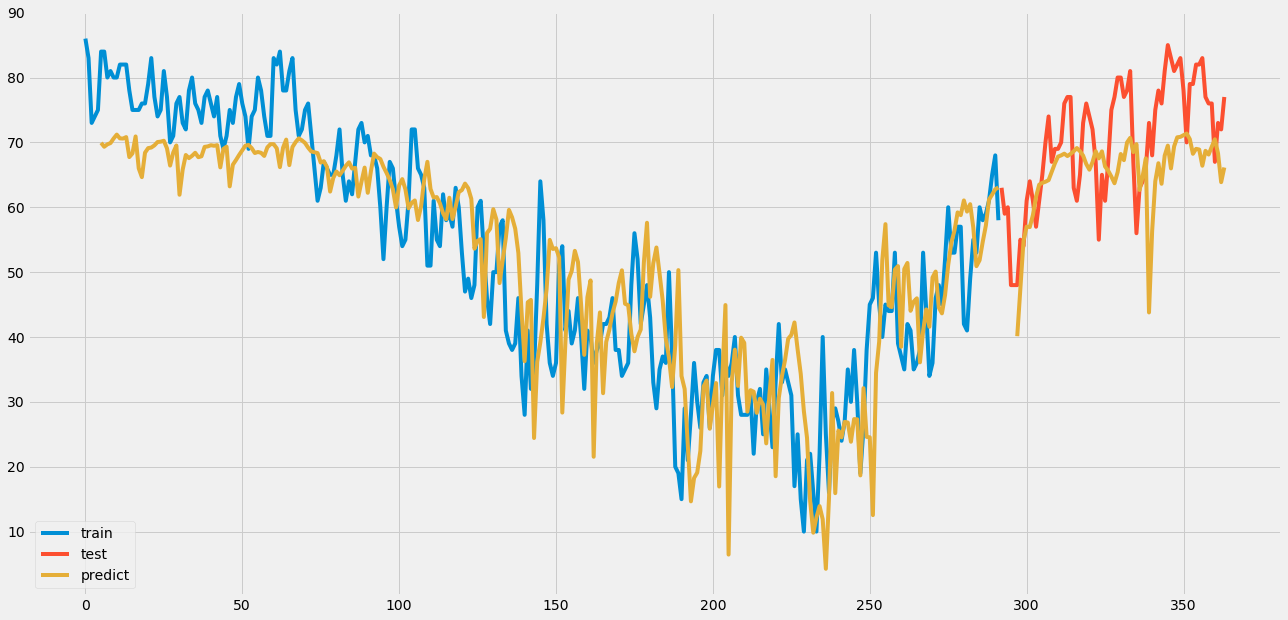

In [11]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.Dense(25, activation='tanh',
                    batch_input_shape=(None, NUM_DAYS * NUM_FEATURES)))
nn.add(layers.Dense(10, activation='tanh'))
nn.add(layers.Dense(1, activation='tanh'))
nn.compile(loss='mae', optimizer='sgd')

model = FNN(analysis, nn, num_days=NUM_DAYS)
analysis.run_model(model)


Recurrent Neural Network

Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 1s - loss: 0.2565 - val_loss: 0.1738
Epoch 2/10
 - 0s - loss: 0.3706 - val_loss: 0.5269
Epoch 3/10
 - 0s - loss: 0.3125 - val_loss: 0.5115
Epoch 4/10
 - 0s - loss: 0.2403 - val_loss: 0.3020
Epoch 5/10
 - 0s - loss: 0.2342 - val_loss: 0.3237
Epoch 6/10
 - 0s - loss: 0.2425 - val_loss: 0.5574
Epoch 7/10
 - 0s - loss: 0.2317 - val_loss: 0.2356
Epoch 8/10
 - 0s - loss: 0.2439 - val_loss: 0.3190
Epoch 9/10
 - 0s - loss: 0.2379 - val_loss: 0.1837
Epoch 10/10
 - 0s - loss: 0.2318 - val_loss: 0.2583


'Train Error: 16.4530957717  Num NaN: 5'

'Test Error: 19.3689857027    Num NaN: 5'

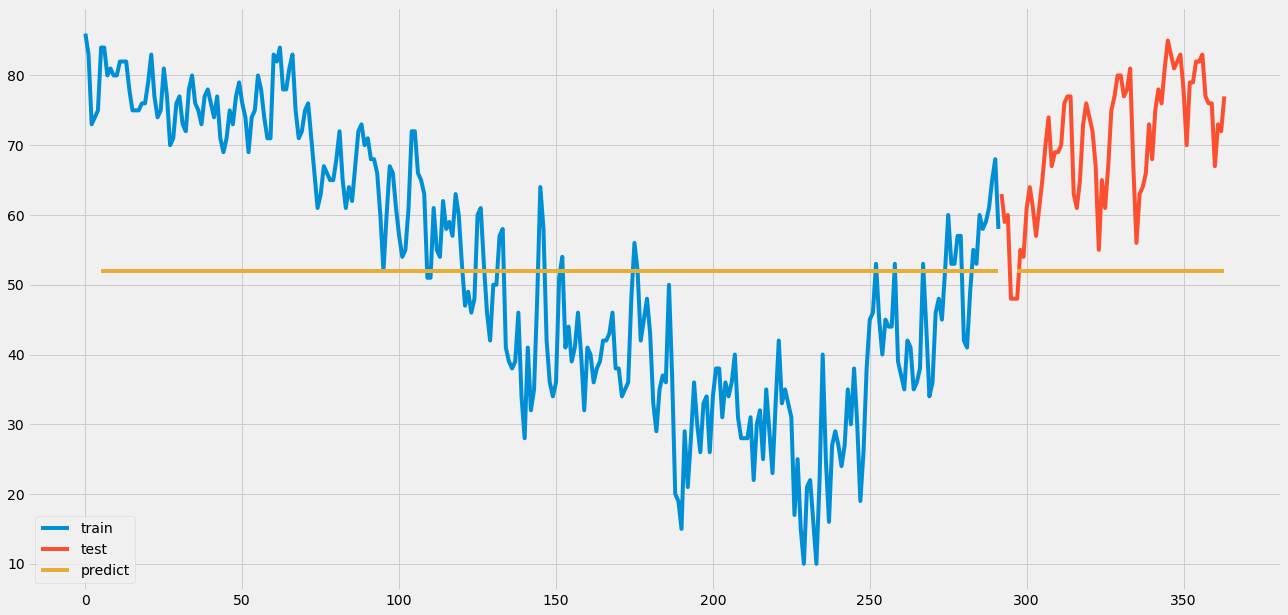

In [12]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.SimpleRNN(50, input_shape=(NUM_DAYS, NUM_FEATURES)))

nn.add(layers.Dense(1, activation='tanh'))
nn.add(layers.Dense(1, activation='linear'))
nn.compile(loss='mae', optimizer=optimizers.RMSprop(lr=0.1))
        
model = RNNSingle(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model)

LSTM Network

In [13]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNMultiple(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model)

Train on 59 samples, validate on 15 samples
Epoch 1/10
 - 1s - loss: 0.8822 - val_loss: 0.6604
Epoch 2/10
 - 0s - loss: 0.6382 - val_loss: 0.4404
Epoch 3/10
 - 0s - loss: 0.4703 - val_loss: 0.3047
Epoch 4/10
 - 0s - loss: 0.3529 - val_loss: 0.2247
Epoch 5/10
 - 0s - loss: 0.2737 - val_loss: 0.1742
Epoch 6/10
 - 0s - loss: 0.2188 - val_loss: 0.1400
Epoch 7/10
 - 0s - loss: 0.1789 - val_loss: 0.1145
Epoch 8/10
 - 0s - loss: 0.1490 - val_loss: 0.0943
Epoch 9/10
 - 0s - loss: 0.1251 - val_loss: 0.0777
Epoch 10/10
 - 0s - loss: 0.1056 - val_loss: 0.0642


IndexError: index 295 is out of bounds for axis 1 with size 295

In [ ]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(len(analysis.x_train), NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(len(analysis.x_train), NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNAll(analysis, nn, mask_value=mask_value)
analysis.run_model(model)